In [12]:
import pandas as pd
import numpy as np

df = pd.read_csv("Expresso_churn_dataset.csv", low_memory=False)

# Data Analysis

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2154048 entries, 0 to 2154047
Data columns (total 19 columns):
 #   Column          Dtype  
---  ------          -----  
 0   user_id         object 
 1   REGION          object 
 2   TENURE          object 
 3   MONTANT         float64
 4   FREQUENCE_RECH  float64
 5   REVENUE         float64
 6   ARPU_SEGMENT    float64
 7   FREQUENCE       float64
 8   DATA_VOLUME     float64
 9   ON_NET          float64
 10  ORANGE          float64
 11  TIGO            float64
 12  ZONE1           float64
 13  ZONE2           float64
 14  MRG             object 
 15  REGULARITY      int64  
 16  TOP_PACK        object 
 17  FREQ_TOP_PACK   float64
 18  CHURN           int64  
dtypes: float64(12), int64(2), object(5)
memory usage: 312.2+ MB


In [9]:
df.describe()

,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,REGULARITY,FREQ_TOP_PACK,CHURN
count,1.397309e+06,1.397309e+06,1.428000e+06,1.428000e+06,1.428000e+06,1.093615e+06,1.367373e+06,1.258800e+06,864032.000000,169721.000000,136824.000000,2.154048e+06,1.251454e+06,2.154048e+06
mean,5.532117e+03,1.152912e+01,5.510810e+03,1.836943e+03,1.397814e+01,3.366450e+03,2.776891e+02,9.541871e+01,23.109253,8.170132,7.553309,2.804251e+01,9.272461e+00,1.875474e-01
std,7.111339e+03,1.327407e+01,7.187113e+03,2.395700e+03,1.469403e+01,1.330446e+04,8.726889e+02,2.049873e+02,63.578086,41.169511,33.487234,2.228686e+01,1.228044e+01,3.903504e-01
min,1.000000e+01,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,1.000000e+00,1.000000e+00,0.000000e+00
25%,1.000000e+03,2.000000e+00,1.000000e+03,3.330000e+02,3.000000e+00,0.000000e+00,5.000000e+00,7.000000e+00,2.000000,0.000000,0.000000,6.000000e+00,2.000000e+00,0.000000e+00
50%,3.000000e+03,7.000000e+00,3.000000e+03,1.000000e+03,9.000000e+00,2.570000e+02,2.700000e+01,2.900000e+01,6.000000,1.000000,2.000000,2.400000e+01,5.000000e+00,0.000000e+00
75%,7.350000e+03,1.600000e+01,7.368000e+03,2.456000e+03,2.000000e+01,2.895000e+03,1.560000e+02,9.900000e+01,20.000000,3.000000,5.000000,5.100000e+01,1.200000e+01,0.000000e+00
max,4.700000e+05,1.330000e+02,5.321770e+05,1.773920e+05,9.100000e+01,1.823866e+06,5.080900e+04,2.132300e+04,4174.000000,4792.000000,3697.000000,6.200000e+01,7.130000e+02,1.000000e+00


In [10]:
df.columns

Index(['user_id', 'REGION', 'TENURE', 'MONTANT', 'FREQUENCE_RECH', 'REVENUE',
       'ARPU_SEGMENT', 'FREQUENCE', 'DATA_VOLUME', 'ON_NET', 'ORANGE', 'TIGO',
       'ZONE1', 'ZONE2', 'MRG', 'REGULARITY', 'TOP_PACK', 'FREQ_TOP_PACK',
       'CHURN'],
      dtype='object')

In [11]:
df.shape

(2154048, 19)

In [12]:
df.dtypes

user_id            object
REGION             object
TENURE             object
MONTANT           float64
FREQUENCE_RECH    float64
REVENUE           float64
ARPU_SEGMENT      float64
FREQUENCE         float64
DATA_VOLUME       float64
ON_NET            float64
ORANGE            float64
TIGO              float64
ZONE1             float64
ZONE2             float64
MRG                object
REGULARITY          int64
TOP_PACK           object
FREQ_TOP_PACK     float64
CHURN               int64
dtype: object

In [13]:
df.isnull().sum()

user_id                 0
REGION             849299
TENURE                  0
MONTANT            756739
FREQUENCE_RECH     756739
REVENUE            726048
ARPU_SEGMENT       726048
FREQUENCE          726048
DATA_VOLUME       1060433
ON_NET             786675
ORANGE             895248
TIGO              1290016
ZONE1             1984327
ZONE2             2017224
MRG                     0
REGULARITY              0
TOP_PACK           902594
FREQ_TOP_PACK      902594
CHURN                   0
dtype: int64

In [14]:
sum(df.isnull().sum())

14380032

In [15]:
cols_to_fill = ['MONTANT', 'FREQUENCE_RECH', 'REVENUE', 'ARPU_SEGMENT', 'FREQUENCE',
                'DATA_VOLUME', 'ON_NET', 'ORANGE', 'TIGO', 'ZONE1', 'ZONE2', 'FREQ_TOP_PACK']

for col in cols_to_fill:
    df[col] = df[col].fillna(df[col].mode()[0])

In [16]:
sum(df.isnull().sum())

1751893

In [17]:
df = df.drop_duplicates()
print(df.duplicated().sum())

0


In [18]:
from scipy.stats import zscore

z_scores = np.abs(zscore(df.select_dtypes(include=[np.number])))
cleaned_dataset = df.copy()

#iterate over each numeric column
for col in df.select_dtypes(include=[np.number]).columns:
    median = df.select_dtypes(include=[np.number])[col].median()
    outliers = z_scores[col] > 3
    cleaned_dataset.loc[outliers, col] = median

df = cleaned_dataset

In [19]:
import plotly.graph_objects as go

crisis_counts = df['CHURN'].value_counts()
fig = go.Figure(data=[ go.Bar(
        x=crisis_counts.index,  #(0 and 1)
        y=crisis_counts.values,  #count of each class
        marker=dict(color='blue')  #marker color to blue
    )])

fig.show()

In [9]:
from sklearn.preprocessing import LabelEncoder

rest_of_the_columns = ['REGION', 'TENURE', 'TOP_PACK']
le = LabelEncoder()

for col in rest_of_the_columns:
    df[col] = le.fit_transform(df[col]) 

In [21]:
df['REGION'].value_counts().to_dict()

{14: 849299,
 0: 513271,
 12: 180052,
 9: 119886,
 7: 99053,
 4: 96986,
 1: 66911,
 11: 55074,
 3: 43963,
 6: 38743,
 2: 35643,
 8: 29083,
 13: 21945,
 10: 3119,
 5: 1020}

In [22]:
df['MRG'].value_counts().to_dict()

{'NO': 2154048}

In [23]:
from imblearn.over_sampling import SMOTE

X = df.drop(columns=["user_id", "MRG", "CHURN"])
Y = df["CHURN"]

smote = SMOTE(random_state=42, n_jobs=-1, k_neighbors=3)
X_resampled, y_resampled = smote.fit_resample(X, Y)

df_resampled = pd.concat([X_resampled, y_resampled], axis=1)
df_resampled.columns = list(X.columns) + ["CHURN"]

df = df_resampled

c:\Users\CESAR\Desktop\online-gmc-data-science\.venv\lib\site-packages\imblearn\over_sampling\_smote\base.py:370: FutureWarning:

The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.



In [19]:
df['CHURN'].value_counts().to_dict()

{0: 1750062, 1: 1750062}

# Data Visualization

C:\Users\CESAR\AppData\Local\Temp\ipykernel_3144\83817741.py:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




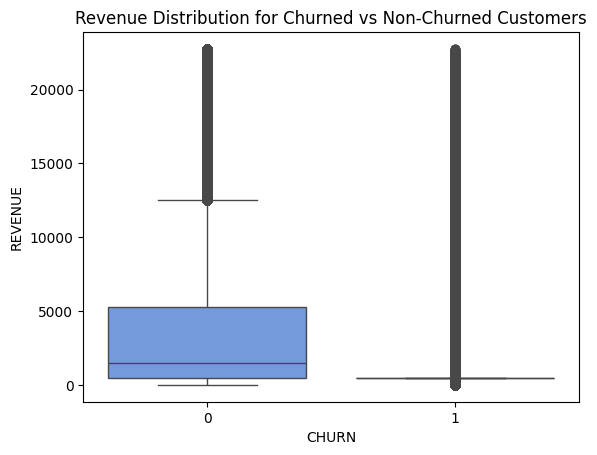

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# CHURN and plot REVENUE distribution #
sns.boxplot(x='CHURN', y='REVENUE', data=df, palette=('cornflowerblue', 'crimson'), legend=False)
plt.title('Revenue Distribution for Churned vs Non-Churned Customers')
plt.show()

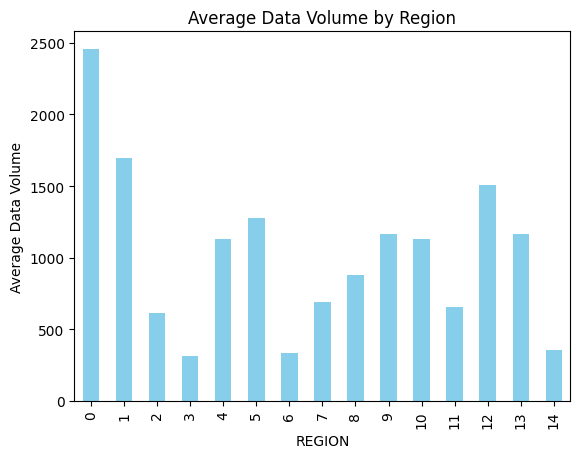

In [21]:
#REGION and calculate the mean of DATA_VOLUME
data_volume_by_region = df.groupby('REGION')['DATA_VOLUME'].mean()

data_volume_by_region.plot(kind='bar', color='skyblue')
plt.title('Average Data Volume by Region')
plt.ylabel('Average Data Volume')
plt.show()

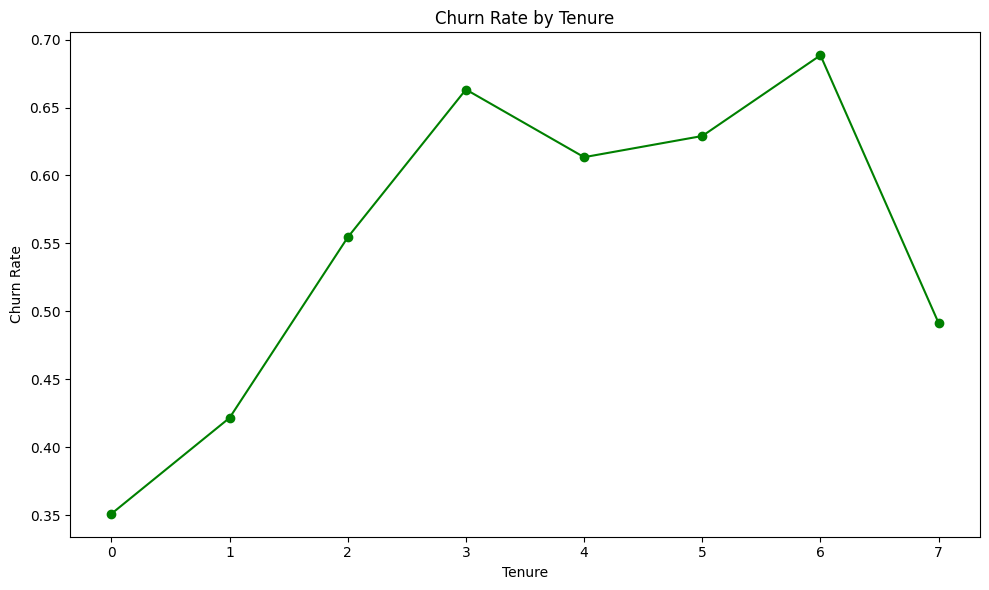

In [22]:
#churn rate by TENURE
churn_rate_by_tenure = df.groupby('TENURE')['CHURN'].mean()

plt.figure(figsize=(10, 6))
churn_rate_by_tenure.plot(kind='line', marker='o', color='green')
plt.title('Churn Rate by Tenure')
plt.xlabel('Tenure')
plt.ylabel('Churn Rate')
plt.tight_layout()  #revent cutoff  
plt.show()

c:\Users\CESAR\Desktop\online-gmc-data-science\.venv\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning:

Creating legend with loc="best" can be slow with large amounts of data.



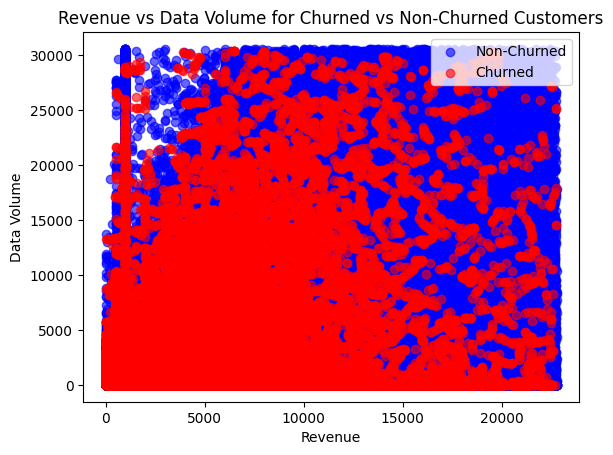

In [23]:
#non-churned vs churn customers (CHURN=0) vs (CHURN=1)
non_churned = df[df['CHURN'] == 0]
churned = df[df['CHURN'] == 1]

plt.scatter(non_churned['REVENUE'], non_churned['DATA_VOLUME'], color='blue', label='Non-Churned', alpha=0.6)
plt.scatter(churned['REVENUE'], churned['DATA_VOLUME'], color='red', label='Churned', alpha=0.6)

plt.title('Revenue vs Data Volume for Churned vs Non-Churned Customers')
plt.xlabel('Revenue')
plt.ylabel('Data Volume')
plt.legend(loc='upper right')
plt.show()

# K-MEANS

In [24]:
X_unsupervised = df[['REGION', 'TENURE', 'MONTANT', 'FREQUENCE_RECH', 'REVENUE',
       'ARPU_SEGMENT', 'FREQUENCE', 'DATA_VOLUME', 'ON_NET', 'ORANGE', 'TIGO',
       'ZONE1', 'ZONE2', 'REGULARITY', 'TOP_PACK', 'FREQ_TOP_PACK']]

In [25]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

#initializes PCA to reduce the dimensionality of the data to 2 components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_unsupervised) #reduces the dimensionality of X_pca
print("PCA Component 1:")
print(X_pca[:, 0])

print("\nPCA Component 2:")
print(X_pca[:, 1])

PCA Component 1:
[ 2557.1355527  -2660.71737549  -260.79972506 ... -2660.67720882
 -2660.72540095 -2660.72272361]

PCA Component 2:
[-1673.60294395   -79.38173164  -822.21640939 ...   -79.38029577
   -79.38202907   -79.38193277]


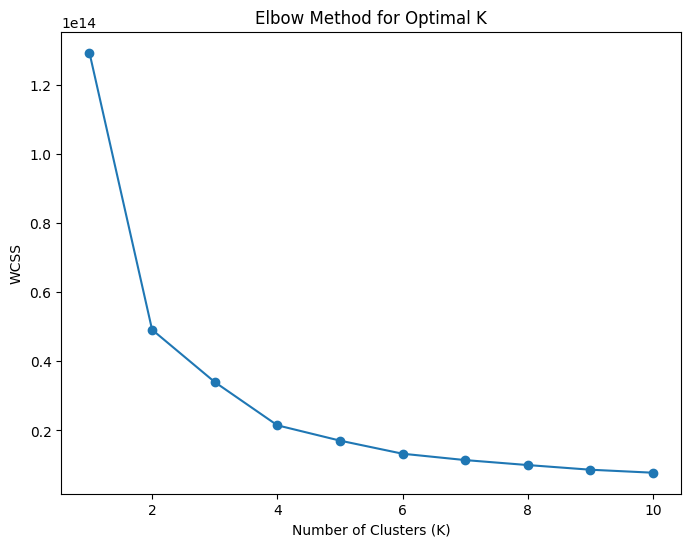

In [26]:
from sklearn.cluster import KMeans

#Try different values of K and plot the inertia (within-cluster sum of squares)
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X_pca)
    wcss.append(kmeans.inertia_)

#WCSS
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS')
plt.show()

c:\Users\CESAR\Desktop\online-gmc-data-science\.venv\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning:

Creating legend with loc="best" can be slow with large amounts of data.



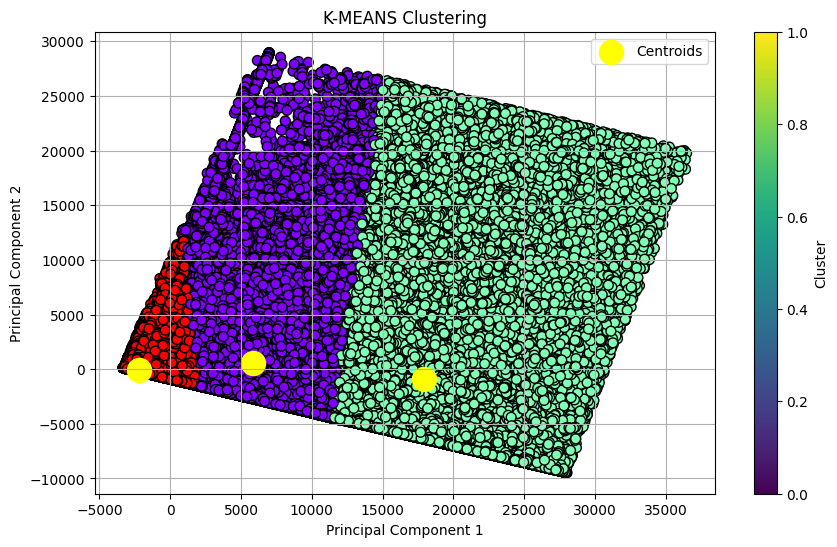

In [27]:
kmeans = KMeans(n_clusters=3, random_state=42)
y_kmeans = kmeans.fit_predict(X_pca)

plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_kmeans, cmap='rainbow', marker='o', edgecolor='k', s=50)  
centroids_pca = kmeans.cluster_centers_
plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], s=300, c='yellow', marker='o', label='Centroids')  

plt.xlabel('Principal Component 1')  
plt.ylabel('Principal Component 2')  
plt.title('K-MEANS Clustering')  
plt.colorbar(label='Cluster')
plt.legend(loc='upper right')
plt.grid()
plt.show()

In [28]:
from sklearn.metrics import silhouette_score

sample_size = int(0.05 * len(X_pca))  #5% of the data
sample_indices = np.random.choice(len(X_pca), sample_size, replace=False)
X_sampled = X_pca[sample_indices]
labels_sampled = kmeans.labels_[sample_indices]

sil_score = silhouette_score(X_sampled, labels_sampled)
print(f'Silhouette Score (Sampled Data): {sil_score:.2f}')

Silhouette Score (Sampled Data): 0.76


# Classification

In [29]:
X = df.drop(columns=['CHURN'], axis=1)
y = df['CHURN']

In [30]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 99)

In [31]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [32]:
from sklearn.ensemble import HistGradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, classification_report

# 1. Histogram-based Gradient Boosting Classification Tree.
hg = HistGradientBoostingClassifier(loss= 'log_loss')
hg.fit(X_train, y_train)
y_pred_hg = hg.predict(X_test)

print("--- HistGradientBoostingClassifier Forest ---")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_hg))
print("Classification Report:\n", classification_report(y_test, y_pred_hg))
cm = confusion_matrix(y_test, y_pred_hg)
specificity = cm[0, 0] / (cm[0, 0] + cm[0, 1])   
print("Specificity:", specificity)
print("\n")

--- HistGradientBoostingClassifier Forest ---
Confusion Matrix:
 [[368399  69048]
 [ 28932 408652]]
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.84      0.88    437447
           1       0.86      0.93      0.89    437584

    accuracy                           0.89    875031
   macro avg       0.89      0.89      0.89    875031
weighted avg       0.89      0.89      0.89    875031

Specificity: 0.842156878433273




In [33]:
# 2. Extreme Gradient Boosting Classification Tree.
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)

print("--- XGBoost Classifier ---")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))
print("Classification Report:\n", classification_report(y_test, y_pred_xgb))
cm = confusion_matrix(y_test, y_pred_xgb)
specificity = cm[0, 0] / (cm[0, 0] + cm[0, 1])
print("Specificity:", specificity)
print("\n")

c:\Users\CESAR\Desktop\online-gmc-data-science\.venv\lib\site-packages\xgboost\core.py:158: UserWarning:

[17:19:47] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




--- XGBoost Classifier ---
Confusion Matrix:
 [[370857  66590]
 [ 24358 413226]]
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.85      0.89    437447
           1       0.86      0.94      0.90    437584

    accuracy                           0.90    875031
   macro avg       0.90      0.90      0.90    875031
weighted avg       0.90      0.90      0.90    875031

Specificity: 0.8477758448452041




In [34]:
# 3. Random Forest Classification Tree.
rf = RandomForestClassifier(n_estimators=68, criterion='gini', max_depth=12, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("--- Random Forest Classifier ---")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))
cm = confusion_matrix(y_test, y_pred_rf)
specificity = cm[0, 0] / (cm[0, 0] + cm[0, 1])
print("Specificity:", specificity)
print("\n")

--- Random Forest Classifier ---
Confusion Matrix:
 [[362307  75140]
 [ 28673 408911]]
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.83      0.87    437447
           1       0.84      0.93      0.89    437584

    accuracy                           0.88    875031
   macro avg       0.89      0.88      0.88    875031
weighted avg       0.89      0.88      0.88    875031

Specificity: 0.8282306199379582




In [35]:
# 4. Multi-layer Perceptron classifier (MLP)
mlp = MLPClassifier(max_iter=222, activation='relu')
mlp.fit(X_train, y_train)
y_pred_mlp = mlp.predict(X_test)

print("--- MLP Classifier ---")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_mlp))
print("Classification Report:\n", classification_report(y_test, y_pred_mlp))
cm = confusion_matrix(y_test, y_pred_mlp)
specificity = cm[0, 0] / (cm[0, 0] + cm[0, 1])
print("Specificity:", specificity)
print("\n")

c:\Users\CESAR\Desktop\online-gmc-data-science\.venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:697: UserWarning:

Training interrupted by user.



--- MLP Classifier ---
Confusion Matrix:
 [[356548  80899]
 [ 36602 400982]]
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.82      0.86    437447
           1       0.83      0.92      0.87    437584

    accuracy                           0.87    875031
   macro avg       0.87      0.87      0.87    875031
weighted avg       0.87      0.87      0.87    875031

Specificity: 0.8150655965179782




In [36]:
# 5. Logistic Regression
lr = LogisticRegression(C=10, fit_intercept=False)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

print("--- Logistic Regression ---")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))
print("Classification Report:\n", classification_report(y_test, y_pred_lr))
cm = confusion_matrix(y_test, y_pred_lr)
specificity = cm[0, 0] / (cm[0, 0] + cm[0, 1])
print("Specificity:", specificity)
print("\n")

--- Logistic Regression ---
Confusion Matrix:
 [[329484 107963]
 [ 30500 407084]]
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.75      0.83    437447
           1       0.79      0.93      0.85    437584

    accuracy                           0.84    875031
   macro avg       0.85      0.84      0.84    875031
weighted avg       0.85      0.84      0.84    875031

Specificity: 0.753197530215089




In [37]:
models = ['Histogram-Boost', 'XGBoost', 'Random Forests', 'Multi-layer Perceptron', 'Logistic Regression']
accuracy_scores = [
    accuracy_score(y_test, y_pred_hg),
    accuracy_score(y_test, y_pred_xgb),
    accuracy_score(y_test, y_pred_rf),
    accuracy_score(y_test, y_pred_mlp),
    accuracy_score(y_test, y_pred_lr)
]

f1_scores = [
    f1_score(y_test, y_pred_hg),
    f1_score(y_test, y_pred_xgb),
    f1_score(y_test, y_pred_rf),
    f1_score(y_test, y_pred_mlp),
    f1_score(y_test, y_pred_lr)
]

results = pd.DataFrame({
    'Model': models,
    'Accuracy Score': accuracy_scores,
    'F1 Score': f1_scores
})

results.set_index('Model').sort_values(by='Accuracy Score', ascending=False)

,Accuracy Score,F1 Score
Model,,
XGBoost,0.896063,0.900863
Histogram-Boost,0.888027,0.892951
Random Forests,0.881361,0.887360
Multi-layer Perceptron,0.865718,0.872207
Logistic Regression,0.841762,0.854652


In [61]:
df.index

RangeIndex(start=0, stop=3500124, step=1)

In [64]:
df.iloc[3500121:].values

array([[ 14.,   7., 500.,   1., 500., 167.,   1.,   0.,   0.,   1.,   1.,
          0.,   0.,  19., 140.,   1.,   1.],
       [ 14.,   7., 500.,   1., 500., 167.,   1.,   0.,   0.,   1.,   1.,
          0.,   0.,   1., 140.,   1.,   1.],
       [ 14.,   7., 500.,   1., 500., 167.,   1.,   0.,   0.,   1.,   1.,
          0.,   0.,   2., 140.,   1.,   1.]])

In [60]:
xgb.predict(sc.transform([[14,7,500,1,500,167,1,0,0,1,1,0,0,2,140,1]]))

c:\Users\CESAR\Desktop\online-gmc-data-science\.venv\lib\site-packages\sklearn\base.py:493: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



array([1])

In [38]:
valeur_predite1 = xgb.predict(sc.transform([[2,7,4250.0,15.0,4251.0,1417.0,17.0,4.0,388.0,46.0,1.0,1.0,2.0,54,107,8.0]]))
valeur_predite1[0]

c:\Users\CESAR\Desktop\online-gmc-data-science\.venv\lib\site-packages\sklearn\base.py:493: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



0

In [39]:
valeur_predite2 = xgb.predict(sc.transform([[5,2,124444,35,1234,5983.44,38.2,1.5,240,46.0,0,0,4.2,23,205,3.9]]))
valeur_predite2[0]

c:\Users\CESAR\Desktop\online-gmc-data-science\.venv\lib\site-packages\sklearn\base.py:493: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



1

In [40]:
import pickle   # biblio qui sauvegarde le modèle #

with open('Expresso_churn_model.pkl', 'wb') as file:
    pickle.dump(xgb, file) #enregistrer le modéle comme fichier physique

In [41]:
with open('Expresso_scaler.pkl', 'wb') as file1:
    pickle.dump(sc, file1) #enregistrer le modéle comme fichier physique